# 01. The Circle in A Square Model

In [1]:
# packages import
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set_theme(style="white")
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

## A. Motivation
> In this notebook, we will learn to estimate $\pi$ value using Monte-Carlo method. Through this exercise, we will learn the basic sampling method, and the validation of Monte-Carlo method by the Law of Large Numbers. We will also get to know some distribution functions (e.g. Uniform and Bernoulli) and how to construct a problem using distribution function. _**Constructing a problem using distribution functions is essential in the implementation Monte-Carlo method**_.

As we know, $\pi$ is irrational, we cannot know the exact value of it to the last digit. But here is the first 15 decimal points; $\pi=3.141592653589793$ that you can get from python numpy package by calling `np.pi`. **In this notebook**, we will learn to estimate the value of $\pi$ using Monte Carlo Method. $\pi$ itself is defined as the ratio between a circle's circumference to its diameter. From this very definition, we can see that estimating $\pi$ is actually a geometric problem. So here we are trying to solve a geometric problem using statistics. _Interesting, isn't it?_  

Consider a quarter of a circle (a _quadrant_) centered at $O(0,0)$ with radius $r=1$. It follows that the area of the quadrant is, $A_{\bigcirc}=\pi r^2 / 4 = \pi/4$. Not let's put this quadrant inside a square spanning from $X \in [0, 1]$ and $Y \in [0, 1]$. It follows that the area of the square is $A_{\square} = 1$. Now suppose we sample a random point $(X_i, Y_i)$ uniformly within the bounding region of $x$ and $y$, the probability of our point being inside the circle will be the ratio of the circle, i.e. $P(X_i^2 + Y_i^2 \leq 1)$, intuitively is just the ratio of the cicle's area to the square's area. 
$$
P(X_i^2 + Y_i^2 \leq 1) = A_{\bigcirc} / A_{\square} = \pi/4
$$

Here we have just transformed the geometry problem into probability problem that we can then proceed to estimating the value of $\pi$.

### Generalization of Monte-Carlo method from this exercise
The excercise of calculating $\pi$ using probability concept is useful depiction of Monte-Carlo method. Generally, Monte-Carlo method is a numerical method that relies on drawing **random sample** from some domain of possible inputs to **estimate** a solution. In this exercise, we sample random points from the domain (the $2 \times 2$ square) in order to estimate the area of the circle ($\pi$).


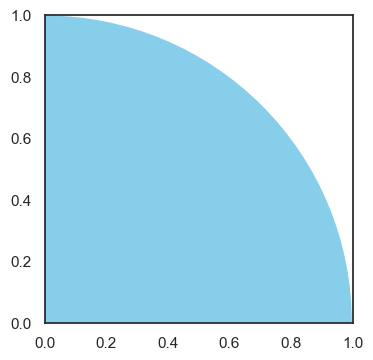

In [20]:
# Draw unit circle inside a square

fig, ax = plt.subplots(figsize=(4,4))
ax.set_xlim(0, 1); ax.set_ylim(0, 1); ax.set_aspect('equal')
ax.add_patch(patches.Circle((0.0, 0.0), 1, facecolor='skyblue', linewidth=1))
plt.show()

## B. The Law of Large Numbers

We will now jump into the Law of Large Numbers to understand how Monte Carlo can be considered a _theoretically valid_ method to estimate the value of $\pi$. If it's not theoretically valid why would we even try, right?  

In order to estimate $\pi$ using our _Circle-in-A-Square_ model, we will sample $N$ independent random points $(X_1, Y_1), (X_2, Y_2), ... (X_N, Y_N)$ where $X, Y \sim \text{Uniform}(0, 1)$. Then for each points $(X_i, Y_i)$ we will assign binary value $1$ or $0$ depending on whether they are inside or outside the circle. In essence;
$$
Z_i(X_i, Y_i) = 
\begin{cases} 
1 & \text{if } X_i^2 + Y_i^2 \leq 1 \\
0 & \text{otherwise}
\end{cases}
$$

An exercise of sampling one random variable and assign them binary value is also known as **Bernoulli process**, and the outcome of such exercise will follow **Bernoulli distribution**. Therefore, $Z_i \sim \text{Bernoulli}(p)$, where $p=\pi/4$, the probability of the point $(X_i, Y_i)$ falling inside the circle. We can write
$$
Z_i \sim \text{Bernoulli}(p) = \text{Bernoulli}(\pi/4)
$$

**The Law of Large Numbers** goes;
> "_For set of $N$ independent-identically-distributed random variables, the **sample mean** will converge to the **expectation value**/**true population mean** as the number of sample $N$ increases indefinitely_"
>
We can apply this law into our model, to our $Z_i$;
$$
\lim_{N \to \infty} \left ( \frac{1}{N} \sum_{i=1}^{N} Z_i \right ) = \mathbb{E}(Z_i) = \mathbb{E}(\text{Bernoulli}(\pi/4)) = \pi/4
$$

Note that the expectation value of $\text{Bernoulli}(p)$ simply equals to $p$. You can learn more about this from Wikipedia articles [Bernoulli process](https://en.wikipedia.org/wiki/Bernoulli_trial) and [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution).  

The equation above gives us the Monte-Carlo procedure;

> 1. Generate a uniform random variable where $X_i \in [-1,1]$ and $Y_i \in [-1,1]$
> 2. Check if $X_i^2 + Y_i^2 \leq 1$ (inside the circle), assign $Z_i = 1$ if true, otherwise $0$
> 3. Repeat step (1) and (2) $N$-times, where $N$ is big enough number
> 4. Calculate the average of $(Z_1, Z_2, ..., Z_N)$
> 5. The average value obtained in step (4) will equal to $\pi/4$.
> 6. Multiplying the average value with $4$ will give us estiamte for $\pi$

which we can then translate into simulation code

# C. The Monte-Carlo Simulation

Finally, let's implement above procedure to code. The next cell is the code to run the simulation. The hear of the Monte-Carlo simulation lies on the line-5 and line-6 of the code where we generate random point $(X_i, Y_i)$ then assign the binary variable $Z_i$ depending on if the point falls inside or outside the circle.
```
L5: x, y = np.random.uniform(0, 1), np.random.uniform(0, 1)
L6: Z = int(x**2 + y**2 <= 1)
```

I hope the rest of the code are self-explanatory and clear enough with all the comments

In [9]:
# THE MONTE-CARLO SIMULATION
points, Z_sum = [], [] # initiate empty lists to store the points and the summation of Z at each step, useful for visualization later
max_steps = int(1e5) # maximum number of simulation steps
for step in range(max_steps): # run the simulation
    x, y = np.random.uniform(0, 1), np.random.uniform(0, 1) # generate sample of random points (x,y) each from the domain 0 to 1, the first quadrant of the square
    Z = int(x**2 + y**2 <= 1) # assign variable Z binary value 1/0, if points is inside/outside the circle
    points.append([x,y]) # keep track the sampled points for visualization later
    if step == 0: # keep track the sum of Z from the beginning up to this step
        Z_sum.append(Z) # if this is the first step, then just append the current Z value
    else:
        Z_sum.append(Z_sum[step - 1] + Z) # if this is not the first step, add the current Z to the previous values in the list before appending

points = np.array(points) # convert points into 2D numpy array to simplify the next math operations
Z_sum = np.array(Z_sum) # convert Z into numpy array to simplify the next math operations

# ESTIMATE THE PI
pi_estimated = 4 * (Z_sum / np.arange(1, len(Z_sum) + 1)) # take the average of Z at avery steps then multiply by 4 to get the estimate of pi
errors = np.sqrt((pi_estimated - np.pi)**2) # compare the estimated value with pi value from numpy, take the root-squared-error

print(f"numpy.pi\t: {np.pi:.15f}")
print(f"estimated pi\t: {pi_estimated[-1]:.15f}")

numpy.pi	: 3.141592653589793
estimated pi	: 3.141320000000000


Well.. That's not bad for an algorithm with only 21 lines of code, innit?  

But actually because the procedure is stochastics, running the simulation again will mostly give different value. It is also interesting to visualize the whole process and to understand deeper what actually went on each step when we run the simulation. Let's see..

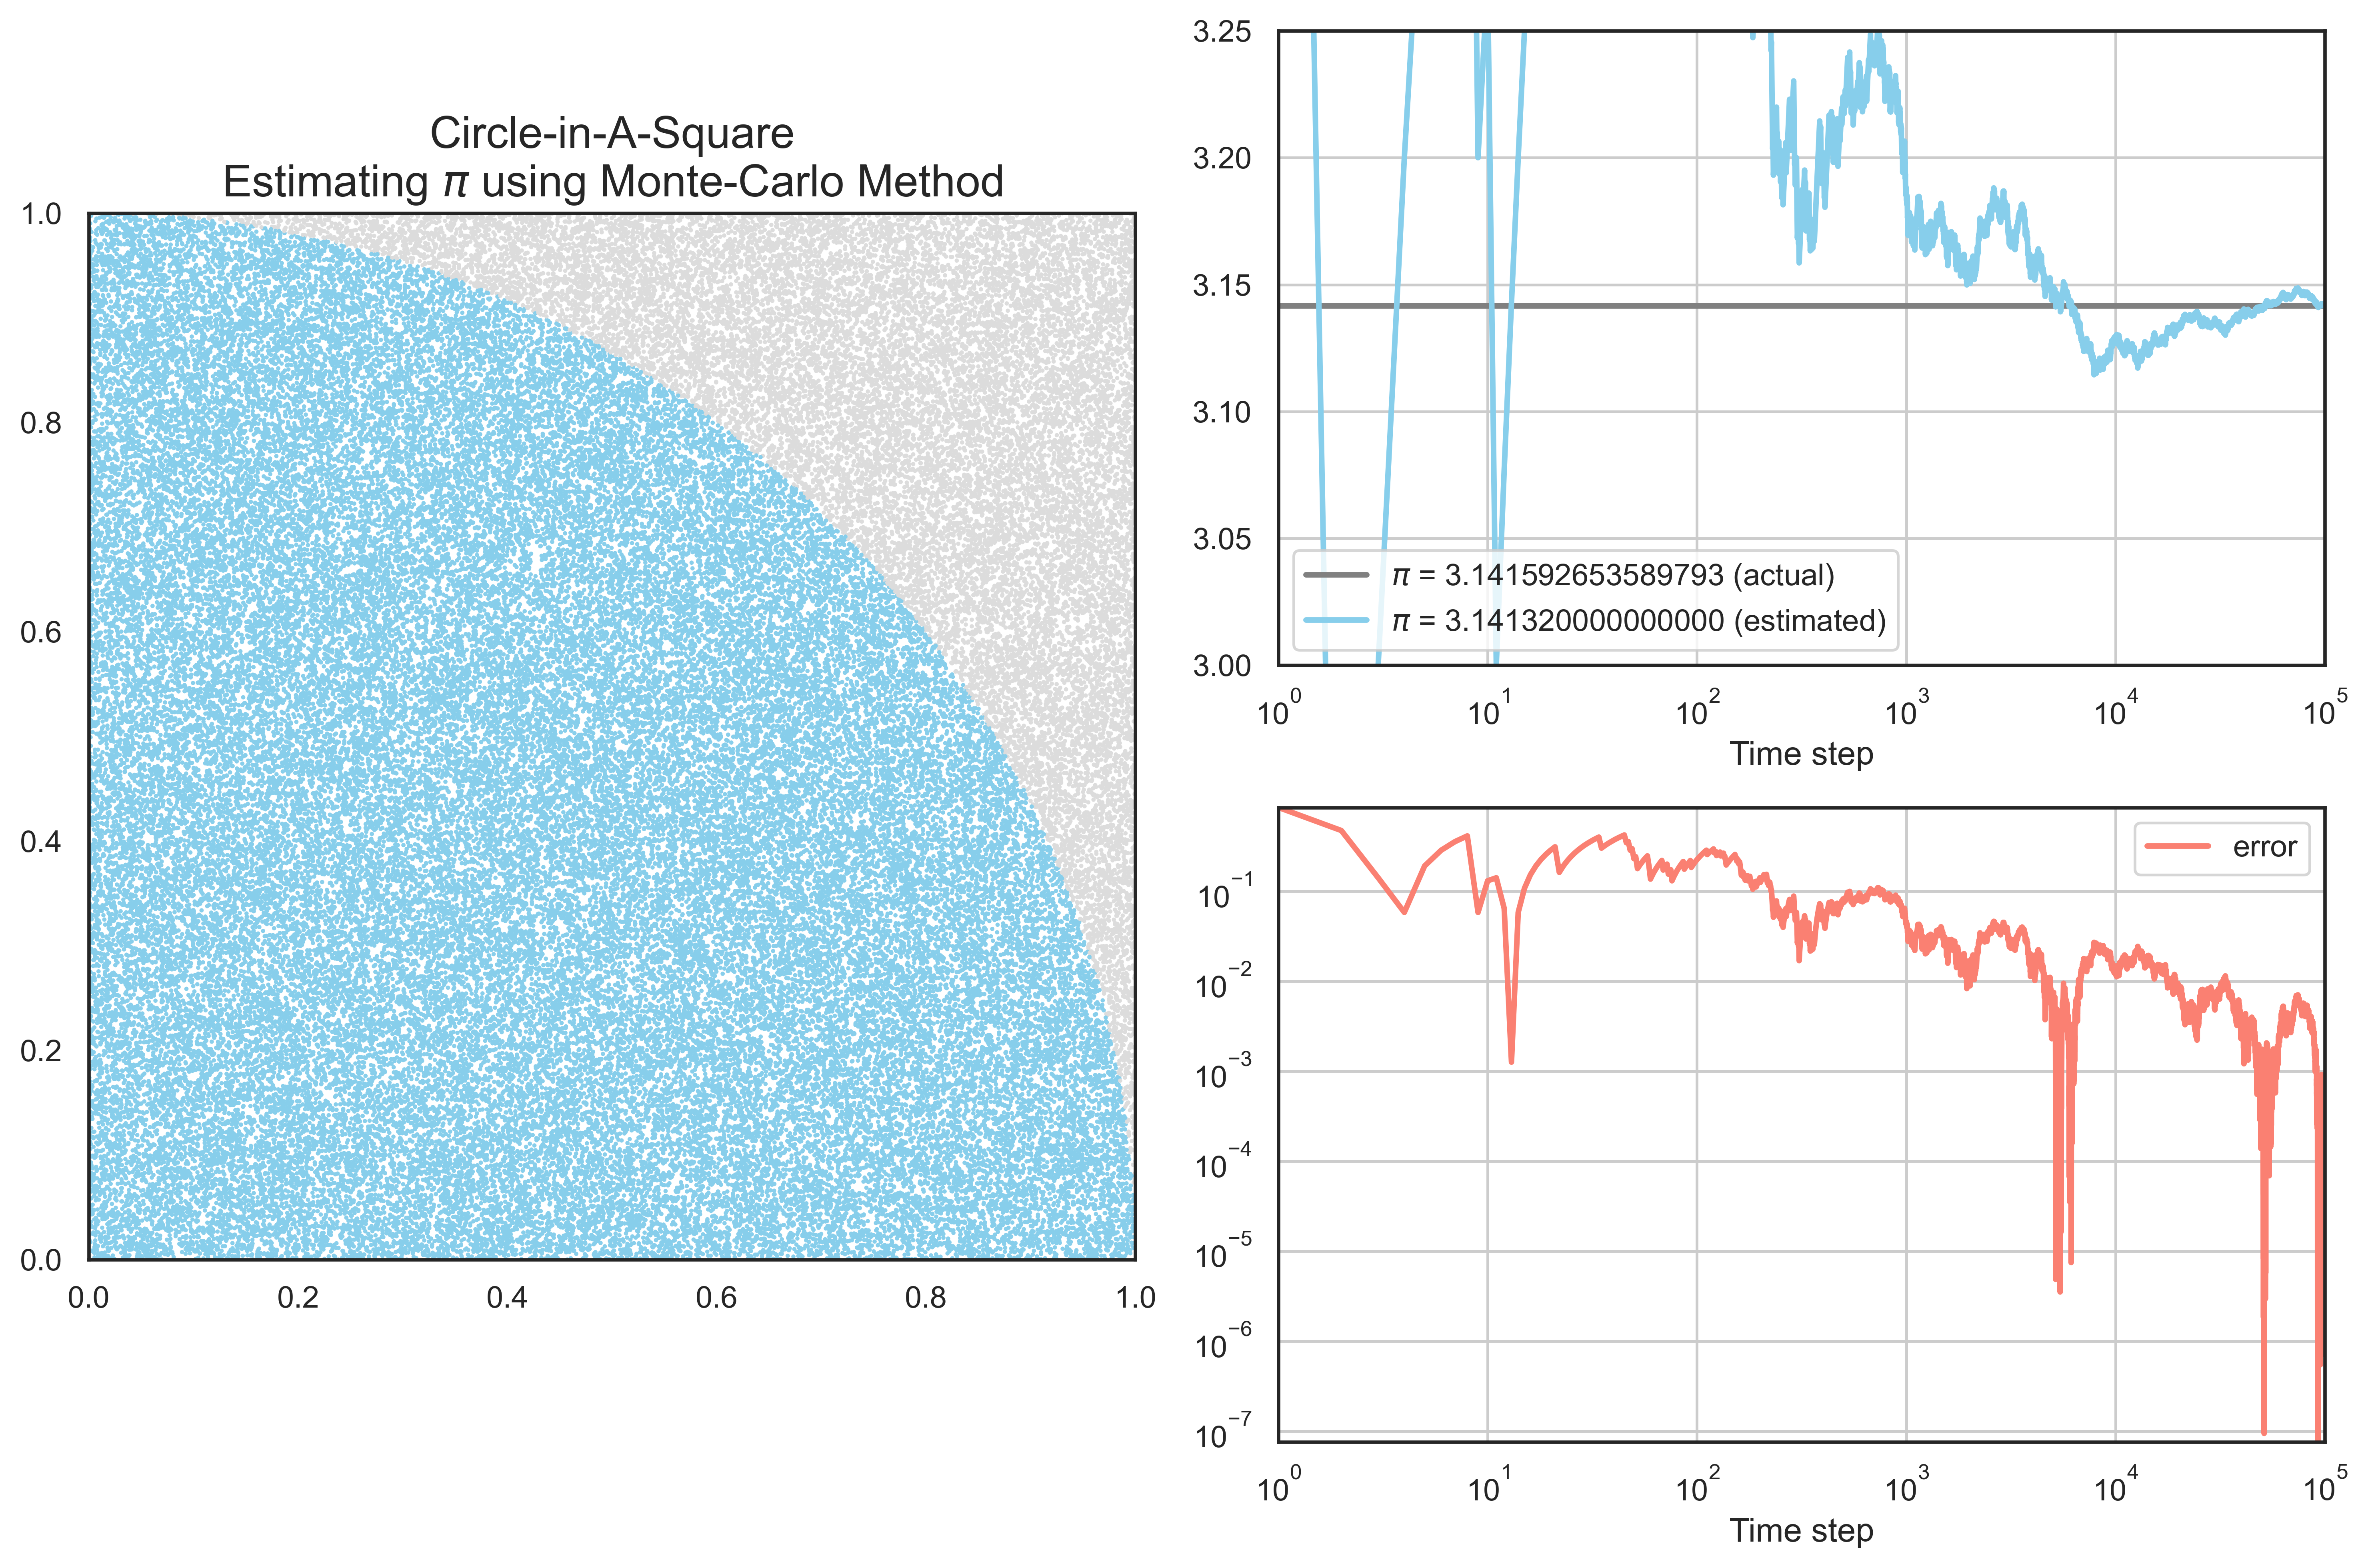

In [ ]:
# Visiualizing and animating the simulation. Run this cell to animate the simulation (It will take a while)

from utils.utils import split_list_to_batch
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams["animation.embed_limit"] = 512

# Prepare the figure and axes to plot

fig = plt.figure(tight_layout=True, figsize=(12,8))
fig.dpi = 500
grid = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(grid[:, 0])
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[1, 1])

# prepare axes to plot the random points
scatt = ax1.scatter([], [], s=0.3)
ax1.set_xlim([0,1])
ax1.set_ylim([0,1])
ax1.set_aspect("equal")
ax1.set_title("Circle-in-A-Square\nEstimating $\pi$ using Monte-Carlo Method", fontsize = 16, )

# prepare axes to plot the pi values over time
ax2.plot(np.array([np.pi]*max_steps), lw=2, c="grey", label=f"$\pi$ = {np.pi:.15f} (actual)")
pi_line = ax2.plot([], [], lw=2, c="skyblue", label=f"$\pi$ (estimated)")[0]
ax2.set_ylim([3, 3.25])
ax2.set_xlim([1, max_steps])
ax2.semilogx()
ax2.set_xlabel("Time step")
ax2.legend(alignment="left", loc="lower left")
ax2.grid()

# prepare axes to plot the error over time
err_line = ax3.plot([], [], lw=2, c="salmon", label="error")[0]
ax3.set_xlim([1, max_steps])
ax3.set_ylim([min(errors), max(errors)])
ax3.loglog()
ax3.set_xlabel("Time step")
ax3.legend()
ax3.grid()

# Animate the simulations
n_frames = 200
n_segments = int(np.log10(max_steps)//1)
n_frames_per_segment = int(n_frames//n_segments)
ts_sampled = []
for i in range(n_segments):
    ts_sampled.extend(
        list(np.linspace(10**(i) - 1, 10**(i+1) - 1, n_frames_per_segment).astype(int))
    ) 
remaining_ts = n_frames - len(ts_sampled)
ts_sampled.extend(np.arange(max_steps - remaining_ts, max_steps))

def animate_simulation_viz(frame): 
    """ 
    function to update the plot in every animation frame
    """
    ts = ts_sampled[frame]
    x, y = points[:ts][:,0], points[:ts][:,1]
    colors = ["skyblue" if x**2 + y**2 <= 1 else "gainsboro" for x,y in zip(x,y)]
    scatt.set_offsets(np.column_stack((x, y)))
    scatt.set_color(colors)
    pi_line.set_data(np.arange(ts), pi_estimated[:ts])
    pi_line.set_label(f"$\pi$ = {pi_estimated[ts]:.15f} (estimated)")
    ax2.legend(alignment="left", loc="lower left")
    err_line.set_data(np.arange(ts), errors[:ts])
    return [pi_line, scatt, err_line]


# plt.close(fig)
anim = FuncAnimation(fig, func=animate_simulation_viz, frames=n_frames, repeat=False, blit=False)

# PICK YOUR PREFERED OUTPUT OF THE ANIMATION
# plot static image of the last frame
animate_simulation_viz(frame=n_frames - 1)
plt.show()

# To export the animation as file
anim.save(filename="outputs/01_the_circle_in_a_square.mp4", writer="ffmpeg", fps=10)

# to run the animation on Jupyter notebook
# HTML(anim.to_jshtml())


# Reflections

As explained above, the Law of The Large Number states that as the number of random samples increases, the average of the samples will be closer to reality (math term: true value / expected value). The closer to the reality the better our estimation accuracy. In our case, the reality we want to reconstruct is a circle inside a square. The animation shows as we generate more points, the reality becomes clearer and clearer. And as we get closer to reality, the accuracy of our $\pi$ estmation gets better.

However, Monte-Carlo is not the best method to estimate pi because it converges very slowly. You can see it in the error graph and you can actually fit it with a function $\sim 1/\sqrt{N}$. Not only that, as more random points are added we might randomly ruin a previously better estimation and end up getting a worse estimation. As observed in the error chart again, there are many better pi estimation that we missed. In fact, we have achieved a very good estimate for $\pi$ at `step < max_steps`, but there is no way to stop early

In [5]:
N_lowest_error = np.where(errors == min(errors))[0][0]
best_pi_estimate = pi_estimated[N_lowest_error]
print(f"Best pi estimate : {best_pi_estimate:.15f}, achieved at N = {N_lowest_error}")
print(f"Numpy pi\t : {np.pi:.15f}")

Best pi estimate : 3.141592463099154, achieved at N = 58060
Numpy pi	 : 3.141592653589793


This is just the consequence of the stochastic behavior of the methods. But although this is not that good for estimating $\pi$, we can actually take benefit of this random behavior for optimization problem. Through a technique called Simulated Annealing, we can use Monte-Carlo method to efficiently solve optimization or combinatorical problem such as Traveling Salesman Problem, or finding a global optima in multimodal cost or energy functions. **Something to discuss in separate notebooks**

# --- End of notebook ---